<a href="https://colab.research.google.com/github/4elvis/Descriptive-Statistics-Project/blob/main/Descriptive_Statitics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction 
Business Understanding
Commenting on the data

**Defining the Question**:
How can a datascience company predict which individuals living in Kenya,Uganda and Rwanda, are willing to have a bank account.

**Defining the metrics for success**.
The findings will reveal the best sales strategy for banks hoping to explore the market in the named countries. Variables under research include: income, hpousehold size, marital status, level of education, age and the type of job the respondent works in.

**Experimental Design**. The study will rely on Correlational Study methods, describing the relationship between variables

**Relevance of the Data.** The data used was collected between the years 2016,2017 and 2018. It is therefore valid to fullfill the objectives of the study.

Intoduction


In [4]:
#Loading the libraries to be used
#Importing libraries and running the data
import numpy as np
import pandas as pd
from subprocess import check_output
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the data

In [9]:
#Reading the data
FinancialDataset = pd.read_csv("http://bit.ly/FinancialDataset")

In [7]:
# Determining the no. of records in our dataset
print('This dataset has ' + str(FinancialDataset.shape[0]) + ' rows, and ' + str(FinancialDataset.shape[1]) + ' columns')



This dataset has 23524 rows, and 13 columns


In [10]:
#A preview of the data set
FinancialDataset.head(6)


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [11]:
# Previewing the bottom of our dataset
FinancialDataset.tail(7)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [12]:
# Checking whether each column has an appropriate datatype
dataTypeSeries=FinancialDataset.dtypes
print('Data type of each column of Dataframe')
print(dataTypeSeries)

Data type of each column of Dataframe
country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object


In [13]:
#Describing the dataset
FinancialDataset.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


Data Cleaning

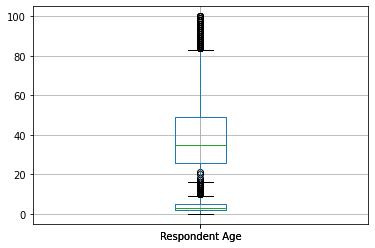

In [21]:
#Checking for outliers
#Checking for outliers for the Respondent Age column
FinancialDataset.boxplot(["Respondent Age"])

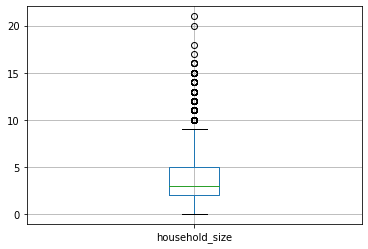

In [22]:
#checking for outliers for the household column
FinancialDataset.boxplot(["household_size"])
print()

In [24]:
#Removing the outliers using z-score
#Removing outliers of the household column
from scipy import stats
z = np.abs(stats.zscore(FinancialDataset['household_size']))
print(z)
#The output below concludes that the household data is constant and can be used. 

[nan nan nan ... nan nan nan]


In [25]:
#Removing outliers in Respondent Age
z = np.abs(stats.zscore(FinancialDataset['Respondent Age']))
print(z)

[nan nan nan ... nan nan nan]


In [26]:
#Checking for Anomalies
q1_30 = FinancialDataset['Respondent Age'].quantile(.25)
q3_30 = FinancialDataset['Respondent Age'].quantile(.75)

iqr_30 = q3_30 - q1_30


q1_64 = FinancialDataset['household_size'].quantile(.25)
q3_64 = FinancialDataset['household_size'].quantile(.75)

iqr_64 = q3_64 - q1_64


In [27]:
#Identifying and Dealing with missing Data
# Identifying missing data
FinancialDataset.isnull

# Dealing with the Missing Data
FinancialDataset.fillna

<bound method DataFrame.fillna of       country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...       

In [28]:
# More data cleaning procedures
FinancialDataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [55]:
#Renaming some column names
FinancialDatasets  = FinancialDataset.rename(columns={"Type of Location":"Type_of_Location","Level of Educuation":"Level_of_Education"})
print(FinancialDatasets.head(6))

  country  year  ...               Level_of_Education                Type of Job
0   Kenya  2018  ...              Secondary education              Self employed
1   Kenya  2018  ...              No formal education       Government Dependent
2   Kenya  2018  ...  Vocational/Specialised training              Self employed
3   Kenya  2018  ...                Primary education  Formally employed Private
4   Kenya  2018  ...                Primary education        Informally employed
5   Kenya  2018  ...                Primary education        Informally employed

[6 rows x 13 columns]


**EXPLORATORY ANALYSIS**
1)Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


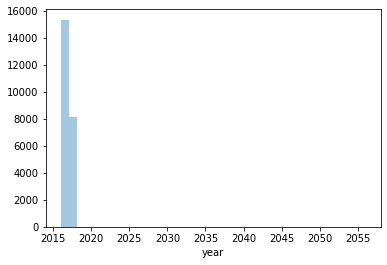

In [32]:
#Plotting the Univariate summaries 
# Ploting the univariate summaries and recording our observations
#Year  Summaries
sns.distplot(FinancialDataset.year.dropna(), kde=False, bins = 39);
#From the graph below, the data is positively skewed revealing that the mean is less than the mode. It means that as the years progress the distribution of individuals willling to have a bank account has reduced.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

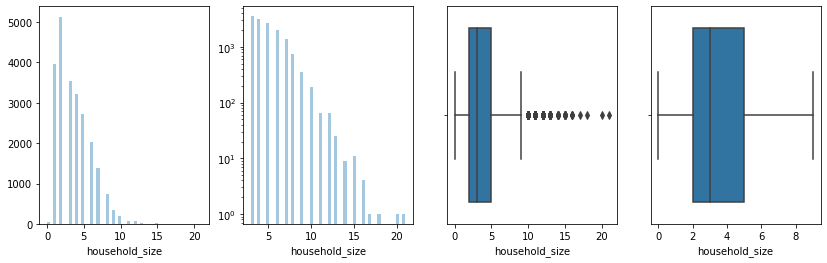

In [44]:
#Household Size Summaries
household_sizefig, axs = plt.subplots(ncols = 4, figsize=(14, 4))

sns.distplot(FinancialDataset.household_size.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(FinancialDataset.household_size.dropna()[FinancialDataset.household_size > 2], kde=False, ax=axs[1])
sns.boxplot(FinancialDataset. household_size, ax=axs[2], orient = 'v')
sns.boxplot(FinancialDataset.household_size, ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')
#The data is skewed positively. The number of households has been reducing.

In [72]:
#Respondent Age Summaries
FinancialDataset["Respondent Age"].kurt()
print(FinancialDataset["Respondent Age"].kurt())
#The data has a positive kurtosis. 

0.10110811880734305


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


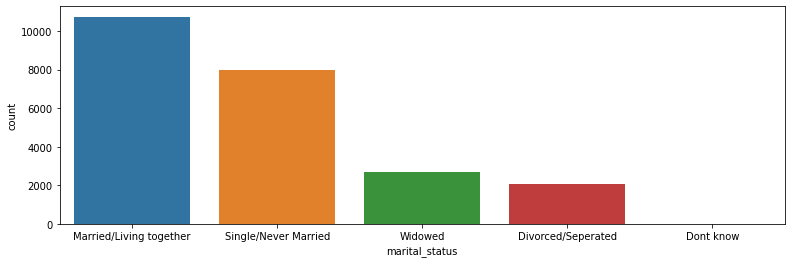

In [45]:
#Marital status summaries
plt.figure(figsize=(13, 4))
sns.countplot(FinancialDataset.marital_status.dropna(), order = FinancialDataset.marital_status.value_counts().index);
#As seen by the blue bar, most of the respondents were married and living together with their spouses.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


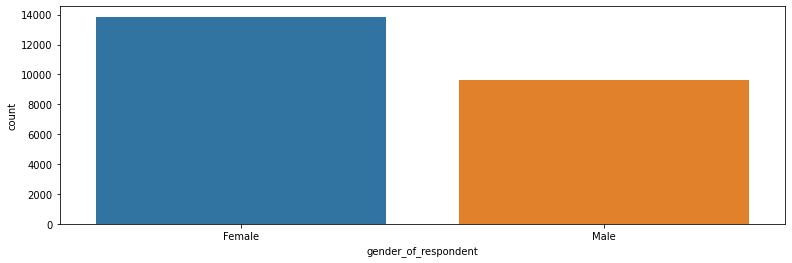

In [48]:
#Type of Gender of Respondent
plt.figure(figsize=(13, 4))
sns.countplot(FinancialDataset.gender_of_respondent.dropna(), order = FinancialDataset.gender_of_respondent.value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


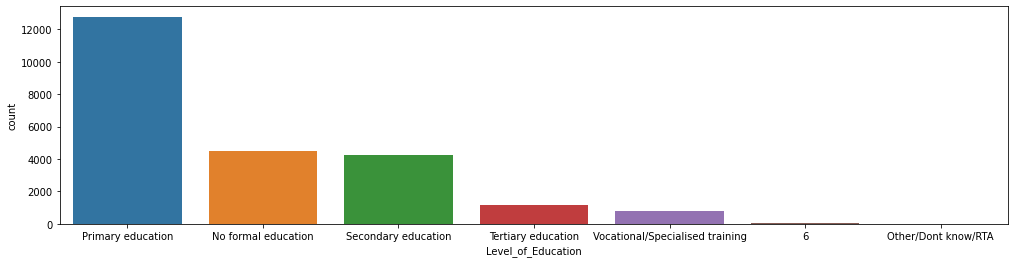

In [61]:
#Level of Education Summaries
plt.figure(figsize=(17, 4))
sns.countplot(FinancialDatasets.Level_of_Education.dropna(), order = FinancialDatasets.Level_of_Education.value_counts().index);
#Their is a huge  gap in the education level in the region. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


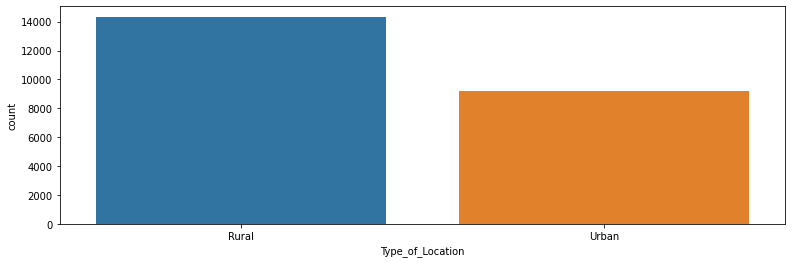

In [58]:
#Location Summaries
plt.figure(figsize=(13, 4))
sns.countplot(FinancialDatasets.Type_of_Location.dropna(), order = FinancialDatasets.Type_of_Location.value_counts().index);
#Most of the respondents are living in Rural Areas.

Bivariate Analysis Summaries

Numerical vs Numerical Data

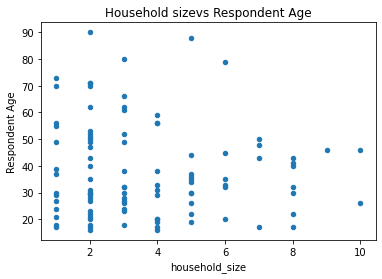

In [66]:
#Household size vs The Respondent Age
FinancialDatasets[FinancialDatasets['household_size'] < 100].sample(100).plot.scatter(x='household_size', y='Respondent Age')
plt.title('Household sizevs Respondent Age')
plt.show()
#The is a notable presence of outliers in the data. Respondnents who were elderly were living in a smaller household size compared to the younger respondnents.

Categorical and Categorical Data

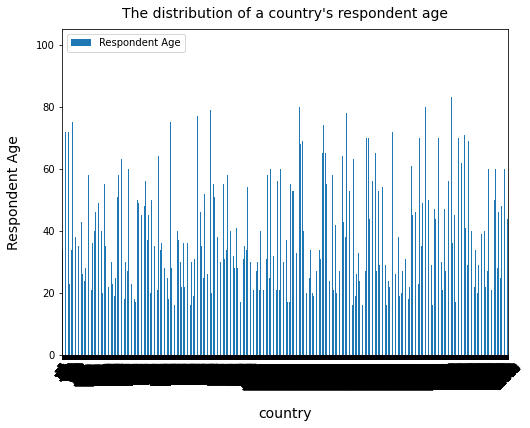

In [65]:
#Country vs the Respondnent Age
FinancialDatasets[['country', 'Respondent Age']].plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)
plt.title("The distribution of a country's respondent age", fontsize=14, y=1.015)
plt.ylabel("Respondent Age", fontsize=14, labelpad=15)
plt.xlabel("country", fontsize=14, labelpad=15)
plt.show()

Multivariate Analysis


In [70]:
#Describing the dataset
FinancialDataset.describe()
#From the data below, 

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


Principal Component Analysis

In [74]:
FinancialDatasets.head(7)
#Prepossing Datasets
 = dataset.drop('country','uniqueid','Has a Bank account', 'Type_ofLocation','' 1)
y = dataset['Class']

,country,year,uniqueid,Has a Bank account,Type_of_Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level_of_Education,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
